###IMPORTACIÓN DE LIBRERÍAS

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno 
import seaborn as sns
plt.style.use('seaborn-whitegrid')

from sklearn.impute import SimpleImputer

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import LabelEncoder

###CARGA DEL DATASET

In [ ]:
dataset = pd.read_csv("dataset_peliculas_chilenas.csv", index_col="ID")
dataset.head()

,Title,Year,Age,IMDb,CineChile,Directors,Genres,Language,Runtime
ID,,,,,,,,,
1,El Chacal de Nahueltoro,1969,NaN,7.7,457,Miguel Littin,"Biography, Crime, Drama",Spanish,95
2,Tres Tristes Tigres,1968,NaN,7.2,369,Raúl Ruiz,Drama,Spanish,100
3,Valparaíso Mi Amor,1969,13+,7.3,225,Aldo Francia,Drama,Spanish,90
4,La Batalla de Chile la lucha de un pueblo sin ...,1975,NaN,8.3,207,Patricio Guzmán,Documentary,Spanish,97
5,Largo Viaje,1967,NaN,7.6,186,Patricio Kaulen,Drama,Spanish,83


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 1 to 60
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Title      60 non-null     object 
 1   Year       60 non-null     int64  
 2   Age        19 non-null     object 
 3   IMDb       60 non-null     float64
 4   CineChile  60 non-null     int64  
 5   Directors  60 non-null     object 
 6   Genres     57 non-null     object 
 7   Language   60 non-null     object 
 8   Runtime    60 non-null     int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 4.7+ KB


In [ ]:
dataset.isna().sum()

Title         0
Year          0
Age          41
IMDb          0
CineChile     0
Directors     0
Genres        3
Language      0
Runtime       0
dtype: int64

In [ ]:
#Quedando con los no nulos
dataset = dataset[dataset['IMDb'].notna()]

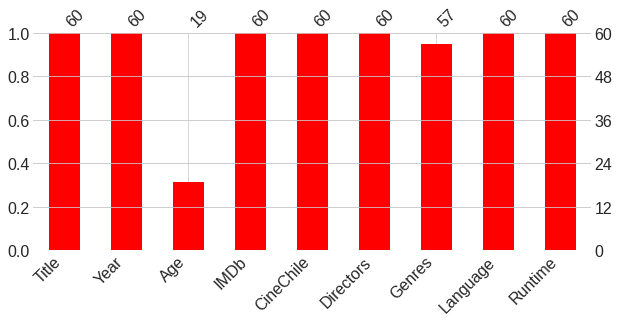

In [ ]:
#Visualizando la cantidad de datos que faltan
msno.bar(dataset ,color='red', figsize=(10, 4))

In [ ]:
#Eliminando columna "CineChile" 
dataset = dataset.drop(['CineChile'], axis=1)
#dataset = dataset.drop(['IMDb'], axis=1)

#"Title" se elimina por ser irrelevante para nuestra predicción.
dataset = dataset.drop(['Title'], axis=1)
dataset.isna().sum()

Year          0
Age          41
IMDb          0
Directors     0
Genres        3
Language      0
Runtime       0
dtype: int64

In [ ]:
#Comprobando valores únicos en "Age" 
dataset['Age'].unique()

array([nan, '13+', 'all', '18+', '7+'], dtype=object)

In [ ]:
#Imputando valores nulos en "Age" con "all"
imputer = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value="all")
dataset["Age"] = imputer.fit_transform(dataset[["Age"]]).ravel()

dataset.isna().sum()

Year         0
Age          0
IMDb         0
Directors    0
Genres       3
Language     0
Runtime      0
dtype: int64

In [ ]:
#Eliminando todas las filas(entradas) en las que hay celdas sin datos
dataset.dropna(axis=0, how='any',inplace=True)

dataset.isna().sum()

Year         0
Age          0
IMDb         0
Directors    0
Genres       0
Language     0
Runtime      0
dtype: int64

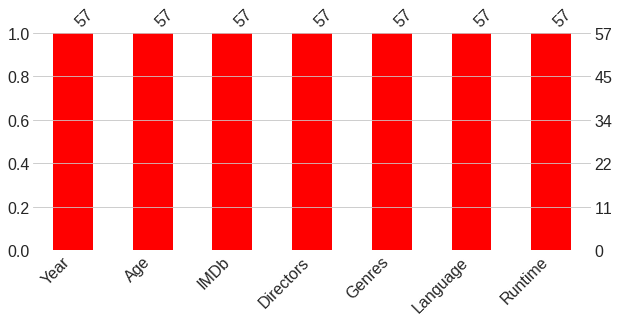

In [ ]:
#Visualizar si faltan más datos o no
msno.bar(dataset ,color='red', figsize=(10, 4))

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57 entries, 1 to 60
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       57 non-null     int64  
 1   Age        57 non-null     object 
 2   IMDb       57 non-null     float64
 3   Directors  57 non-null     object 
 4   Genres     57 non-null     object 
 5   Language   57 non-null     object 
 6   Runtime    57 non-null     int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 3.6+ KB


In [ ]:
#Elegimos el objetivo(IMDb) y las características
y = dataset.IMDb
#y = dataset.CineChile

X = dataset.drop(['IMDb'], axis=1)
#X = dataset.drop(['CineChile'], axis=1)

#Dividiendo los datos para el entrenamiento y la prueba
X_train_full, X_test_full, y_train, y_test  = train_test_split(X, y,random_state = 0)

#Lista de columnas categóricas que se utilizarán como características
cat_cols=["Age","Directors","Genres","Language"]

#Lista de columnas numéricas que se utilizarán como características
numerical_cols = ['Year','Runtime']

#Mantener sólo las columnas seleccionadas
my_cols = numerical_cols + cat_cols 
X_train = X_train_full[my_cols].copy()
X_test = X_test_full[my_cols].copy()

###ENTRENAMIENTO Y TESTEO

In [ ]:
#Visualización de datos de entrenamiento
X_train.head()

,Year,Runtime,Age,Directors,Genres,Language
ID,,,,,,
41,2000,30,all,Tevo Díaz,"Documentary, Short","Spanish, English"
38,1981,70,all,Carlos Flores del Pino,Documentary,Spanish
8,2015,98,18+,Pablo Larraín,"Comedy, Drama, Mystery",Spanish
15,2000,77,all,Ignacio Agüero,Documentary,Spanish
32,2014,82,all,Alejandro Fernández Almendras,"Crime, Drama, Thriller",Spanish


In [ ]:
#Visualización de datos de prueba
X_test.head()

,Year,Runtime,Age,Directors,Genres,Language
ID,,,,,,
36,2002,81,all,Raúl Ruiz,"Documentary, Comedy, Drama","Spanish, French"
35,2013,120,all,Ignacio Agüero,Documentary,Spanish
42,1974,70,all,"Silvio Caiozzi, Pablo Perelman",Drama,Spanish
28,2004,89,all,Raúl Ruiz,Drama,Spanish
12,1988,55,all,Ignacio Agüero,Documentary,Spanish


In [ ]:
#Copiando los datos para evitar el cambio en el dataset original
label_X_train = X_train.copy()
label_X_test = X_test.copy()

#Aplicar el codificador de etiquetas a cada columna con datos categóricos
label_encoder = LabelEncoder()
for col in cat_cols:
    label_encoder.fit(pd.concat([label_X_train[col], label_X_test[col]], axis=0, sort=False))
    label_X_train[col] = label_encoder.transform(label_X_train[col])
    label_X_test[col] = label_encoder.transform(label_X_test[col])

###Modelos

In [ ]:
#Definir los modelos
model_1 = RandomForestRegressor(n_estimators=50, random_state=1)
model_2 = RandomForestRegressor(n_estimators=100, random_state=1)
model_3 = RandomForestRegressor(n_estimators=100, criterion='mae', random_state=1)
model_4 = RandomForestRegressor(n_estimators=200, min_samples_split=20, random_state=1)
model_5 = RandomForestRegressor(n_estimators=100, max_depth=7, random_state=1)

model_6 = RandomForestRegressor(n_estimators=50, max_depth=7, random_state=1)
model_7 = RandomForestRegressor(n_estimators=300, max_depth=9, random_state=1)
model_8 = RandomForestRegressor(n_estimators=400, max_depth=8, random_state=1)
model_9 = RandomForestRegressor(n_estimators=500, max_depth=10, random_state=1)
model_10 = RandomForestRegressor(n_estimators=1000, max_depth=10, random_state=1)

#Lista de modelos
models = [model_1, model_2, model_3, model_4, model_5, model_6, model_7, model_8, model_9, model_10]

###Resultados

In [ ]:
#Función para comparar diferentes modelos
def score_model(model, X_t=label_X_train, X_v=label_X_test, y_t=y_train, y_v=y_test):
    model.fit(X_t, y_t)
    preds = model.predict(X_v)
    return mean_absolute_error(y_v, preds)

mae_scores=[]

for i in range(0, len(models)):
    mae = score_model(models[i])
    print("Modelo %d MAE(Error medio absoluto): %f" % (i+1, mae))
    mae_scores.append(mae)

Modelo 1 MAE(Error medio absoluto): 0.536000
Modelo 2 MAE(Error medio absoluto): 0.546133
Modelo 3 MAE(Error medio absoluto): 0.524333
Modelo 4 MAE(Error medio absoluto): 0.579585
Modelo 5 MAE(Error medio absoluto): 0.548294
Modelo 6 MAE(Error medio absoluto): 0.538313
Modelo 7 MAE(Error medio absoluto): 0.531671
Modelo 8 MAE(Error medio absoluto): 0.531943
Modelo 9 MAE(Error medio absoluto): 0.532261
Modelo 10 MAE(Error medio absoluto): 0.533513


In [ ]:
best_score=min(mae_scores)
best_score

0.5243333333333343